In [1]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker

%config InlineBackend.figure_format = 'retina'

In [2]:
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/mlbootcamp5_train.csv"

In [4]:
df = pd.read_csv(DATA_PATH, sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


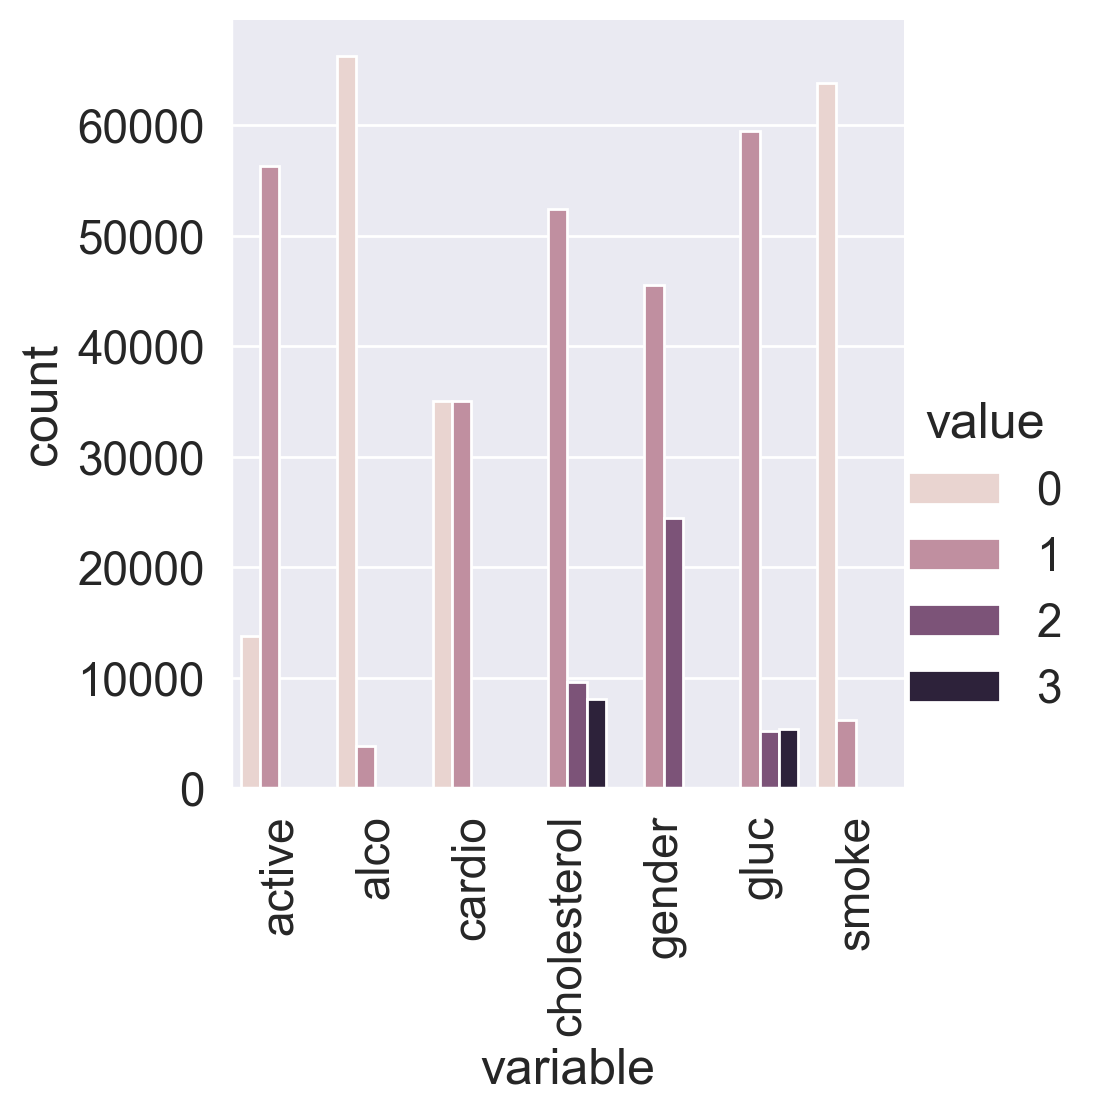

In [10]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

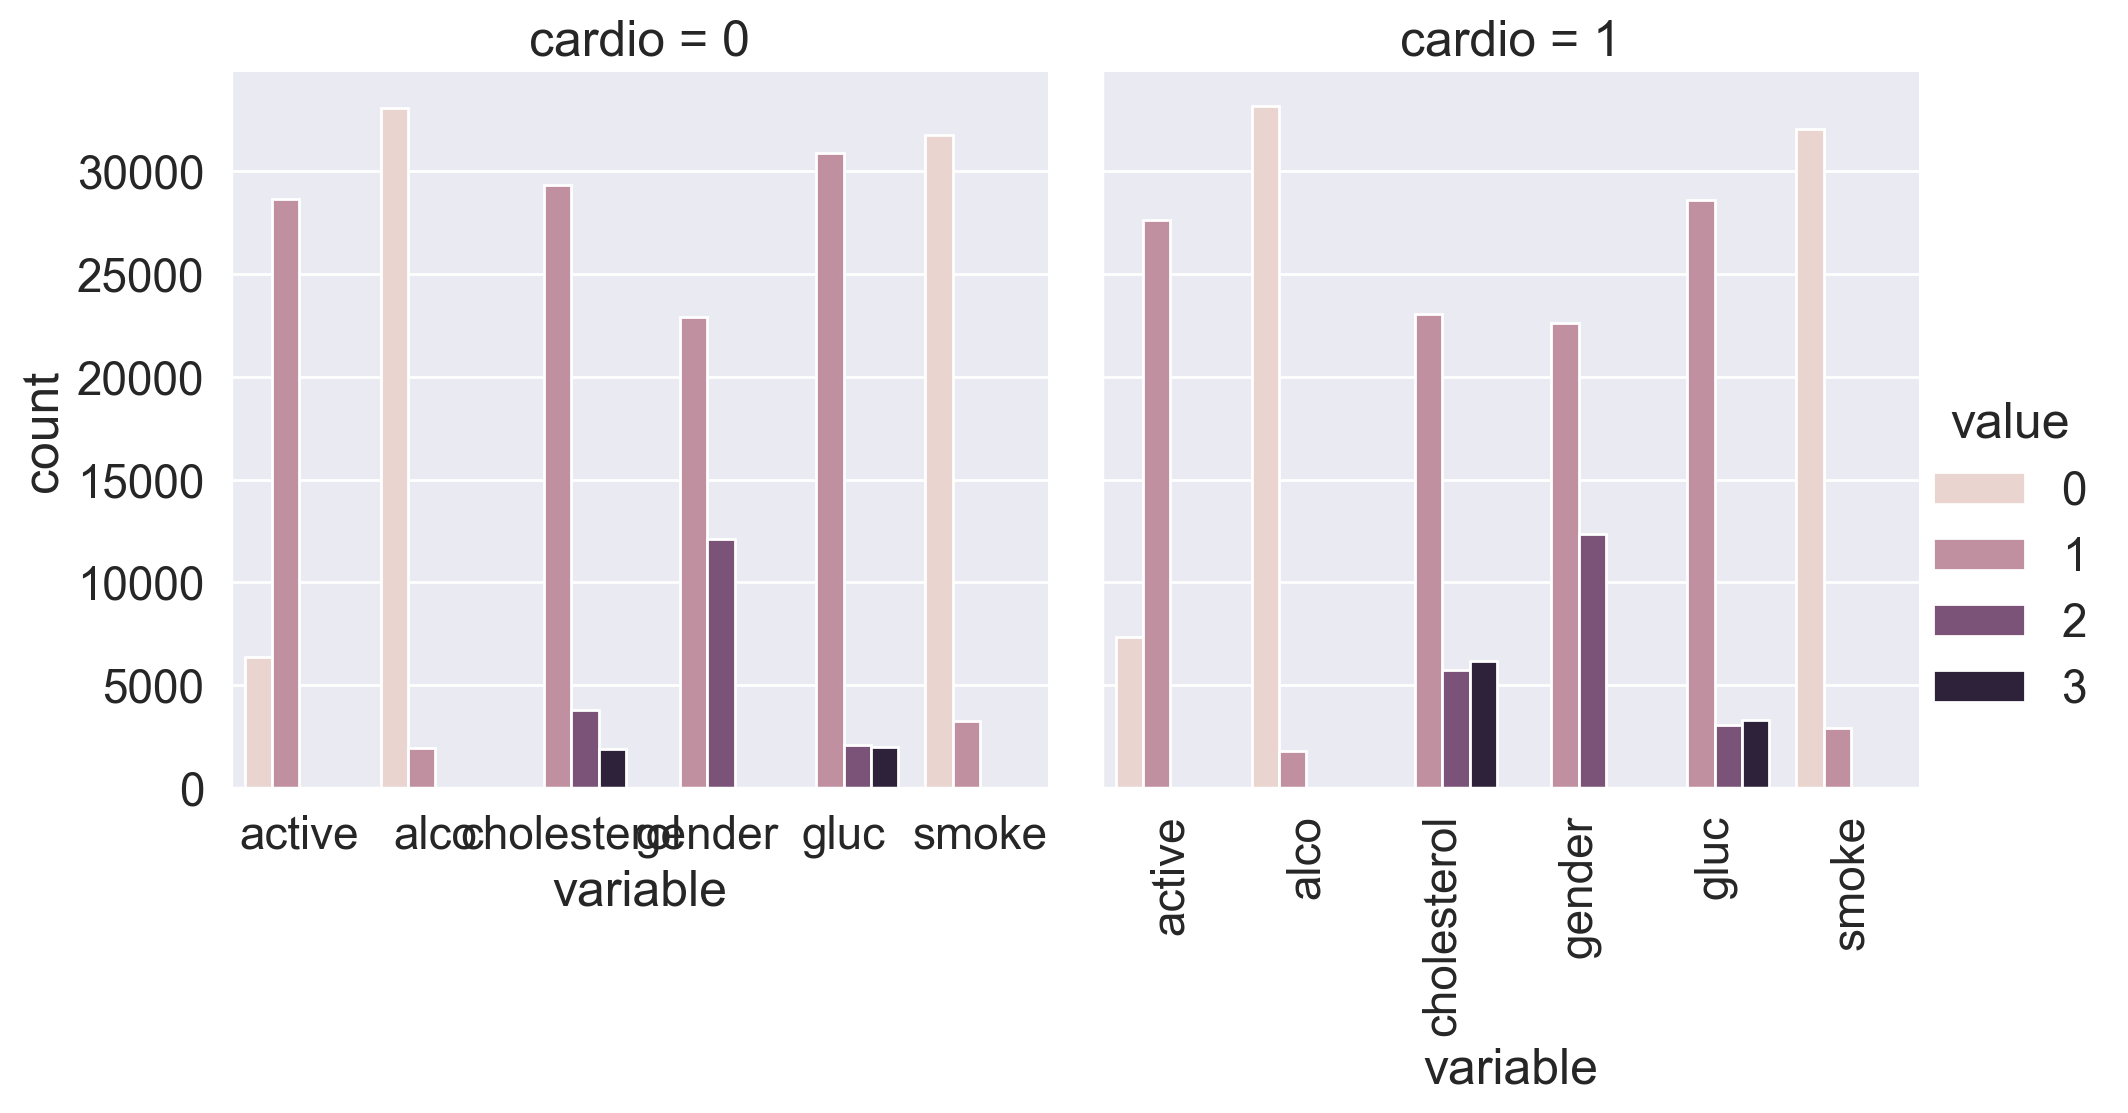

In [11]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [12]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [13]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [15]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [19]:
df.groupby('gender')['alco'].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: count, dtype: int64

In [32]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [40]:
counts = df.groupby('gender')['smoke'].mean()

round((counts[2]-counts[1]) * 100)

20

In [41]:
df[['age']].head()

,age
0,18393
1,20228
2,18857
3,17623
4,17474


In [44]:
df['age'].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

<Axes: >

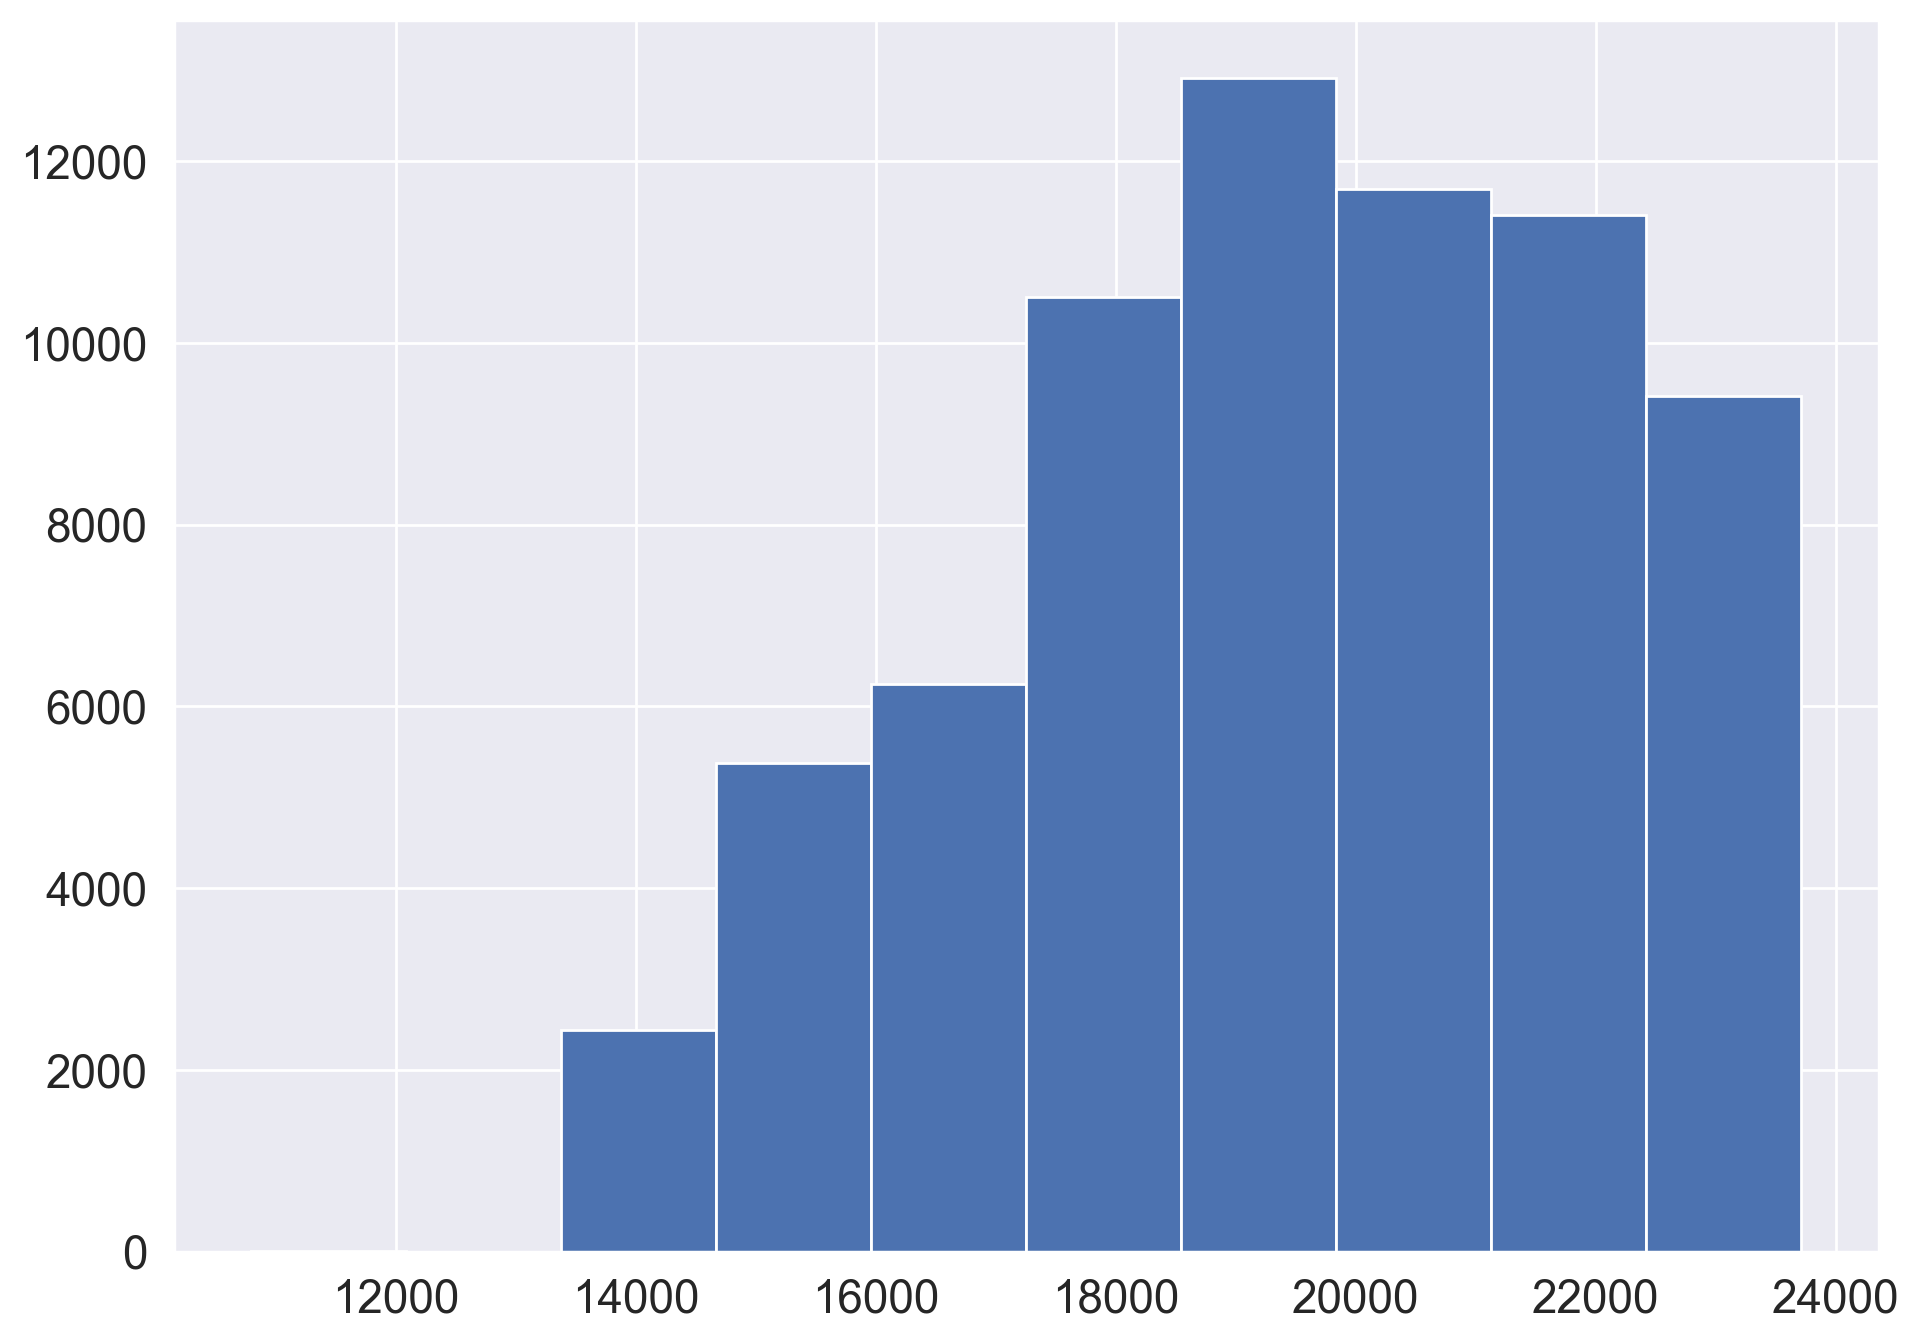

In [47]:
df['age'].hist()

In [50]:
df['age'].head(50)

0     18393
1     20228
2     18857
3     17623
4     17474
5     21914
6     22113
7     22584
8     17668
9     19834
10    22530
11    18815
12    14791
13    19809
14    14532
15    16782
16    21296
17    16747
18    17482
19    21755
20    19778
21    21413
22    23046
23    23376
24    16608
25    14453
26    19559
27    18085
28    14574
29    21057
30    18291
31    23186
32    14605
33    20652
34    21940
35    20404
36    18328
37    17976
38    23388
39    18126
40    19848
41    18274
42    21475
43    20556
44    19764
45    17471
46    18207
47    18535
48    16864
49    16045
Name: age, dtype: int64

In [73]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [79]:
df['age_years'] = round(df['age'] / 365).astype('int')

In [80]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,cholesterol_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,8
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,8
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,4
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,4


In [81]:
cholesterol_map = {1:'4',2:'5-7',3:'8'}
df['cholesterol_mmol'] = df['cholesterol'].map(cholesterol_map)

In [82]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,cholesterol_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,8
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,8
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,4
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,4


In [83]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

In [84]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2564102564102564

In [85]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

0.8636363636363636

In [86]:
df['weight'].head(50)

0      62.0
1      85.0
2      64.0
3      82.0
4      56.0
5      67.0
6      93.0
7      95.0
8      71.0
9      68.0
10     80.0
11     60.0
12     60.0
13     78.0
14     95.0
15    112.0
16     75.0
17     52.0
18     68.0
19     56.0
20     83.0
21     69.0
22     90.0
23     45.0
24     68.0
25     65.0
26     59.0
27     78.0
28     66.0
29     74.0
30    105.0
31     71.0
32     60.0
33     73.0
34     82.0
35     55.0
36     95.0
37     70.0
38     72.0
39     70.0
40     62.0
41     68.0
42     69.0
43     63.0
44     50.0
45     64.0
46    107.0
47     69.0
48     70.0
49     69.0
Name: weight, dtype: float64

In [97]:
df['bmi'] = df['weight']/(df['height']*0.01)**2
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,cholesterol_mmol,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,8,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,8,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,4,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,4,23.011177


In [98]:
df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [99]:
df.groupby('gender')['bmi'].mean()

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

In [124]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963


<Axes: >

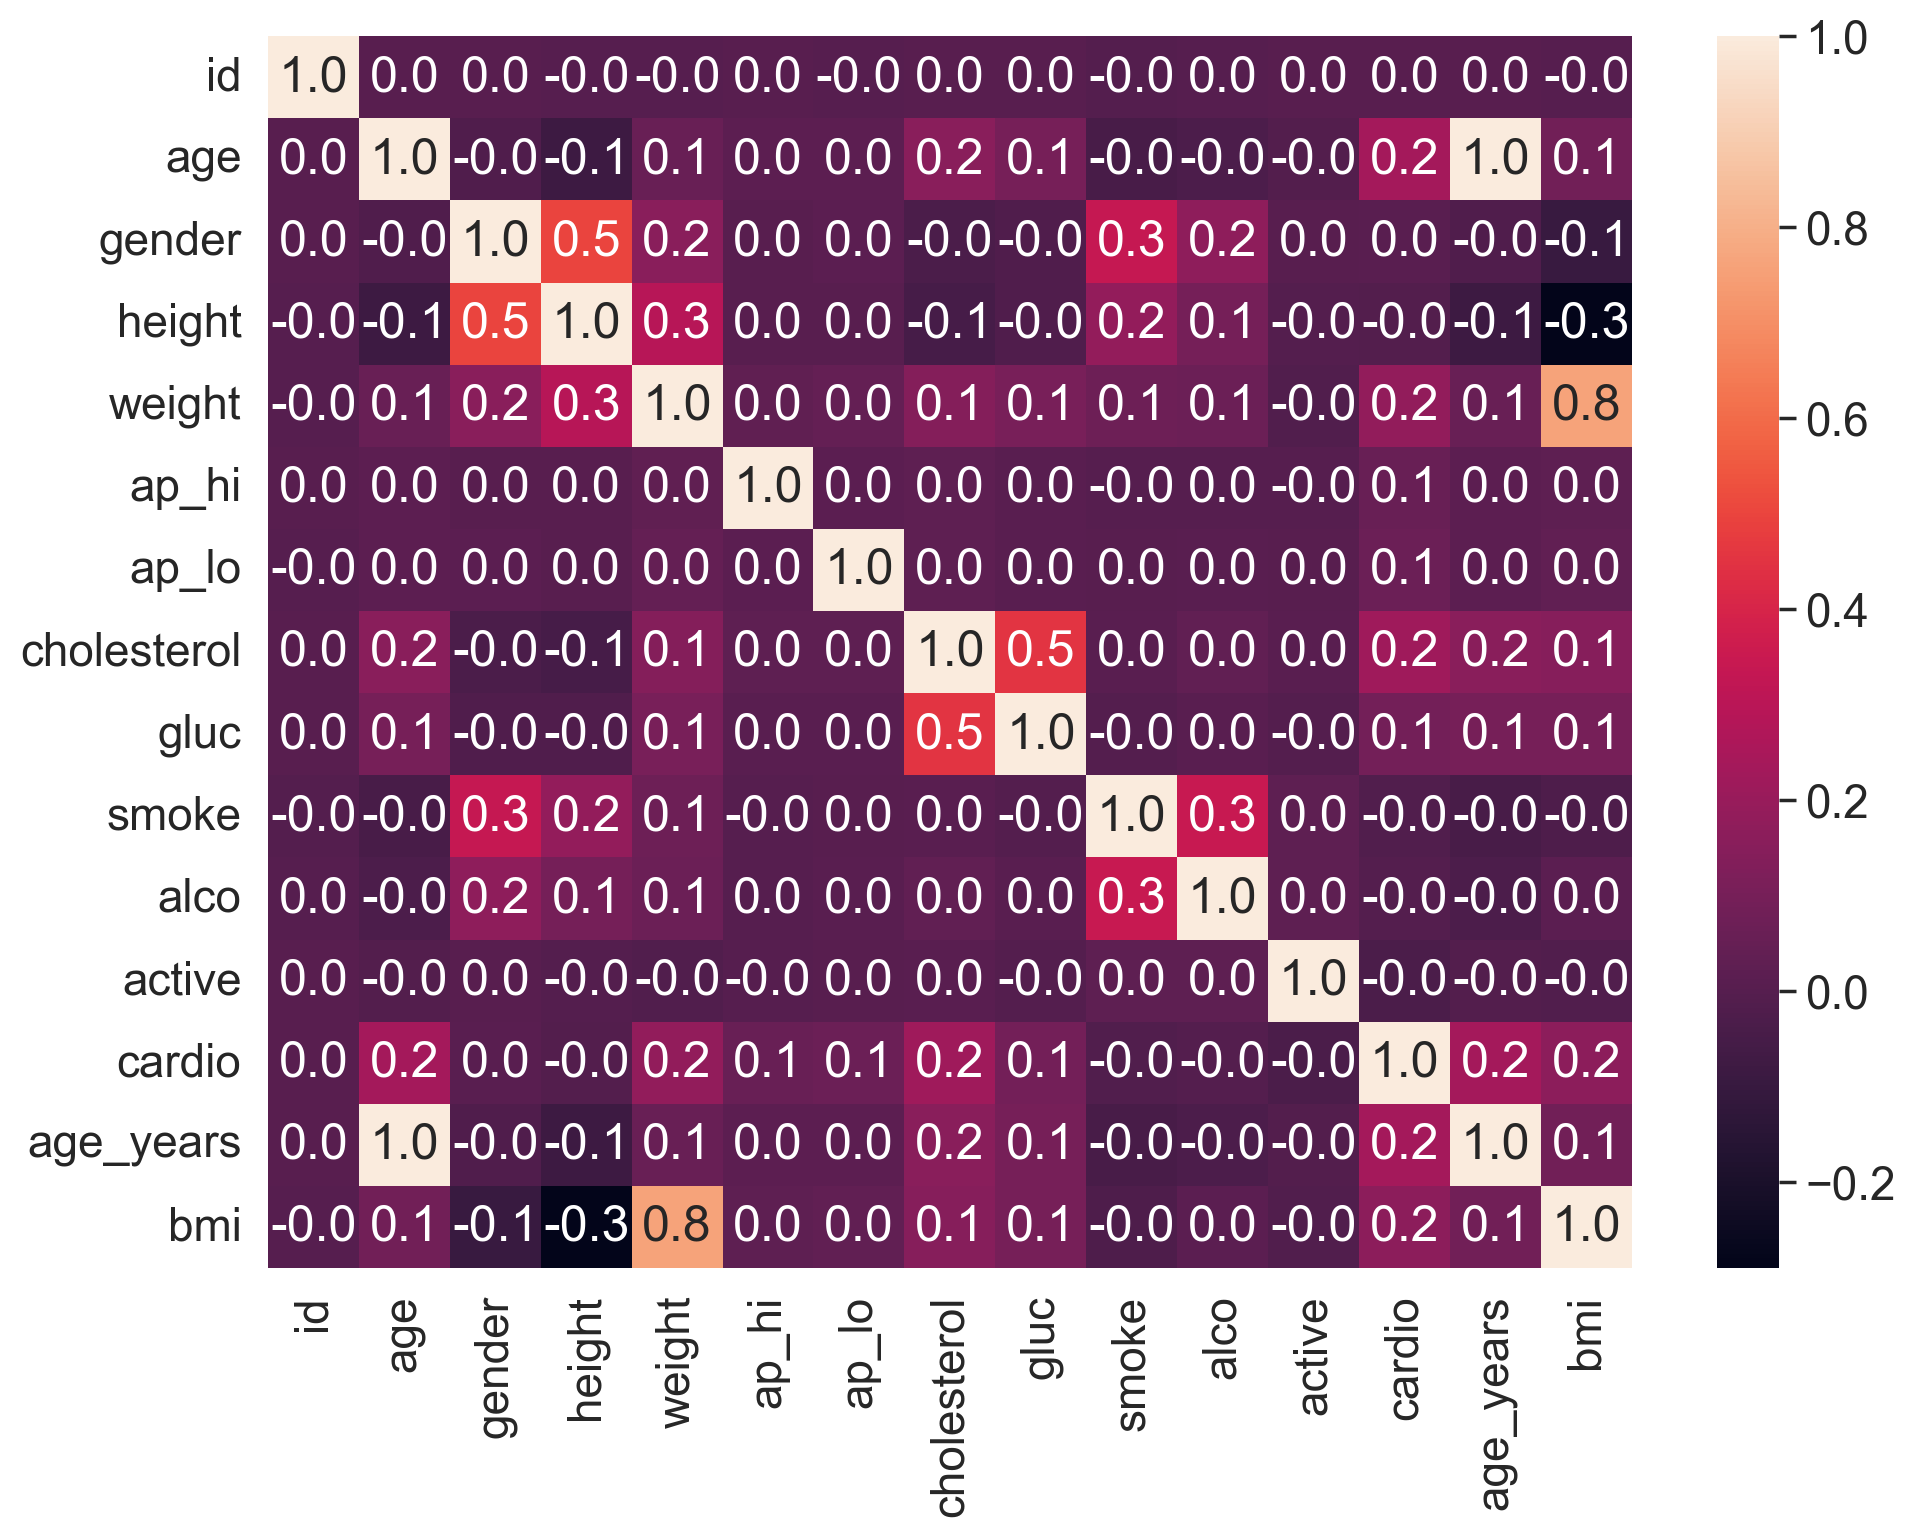

In [129]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,fmt='.1f')

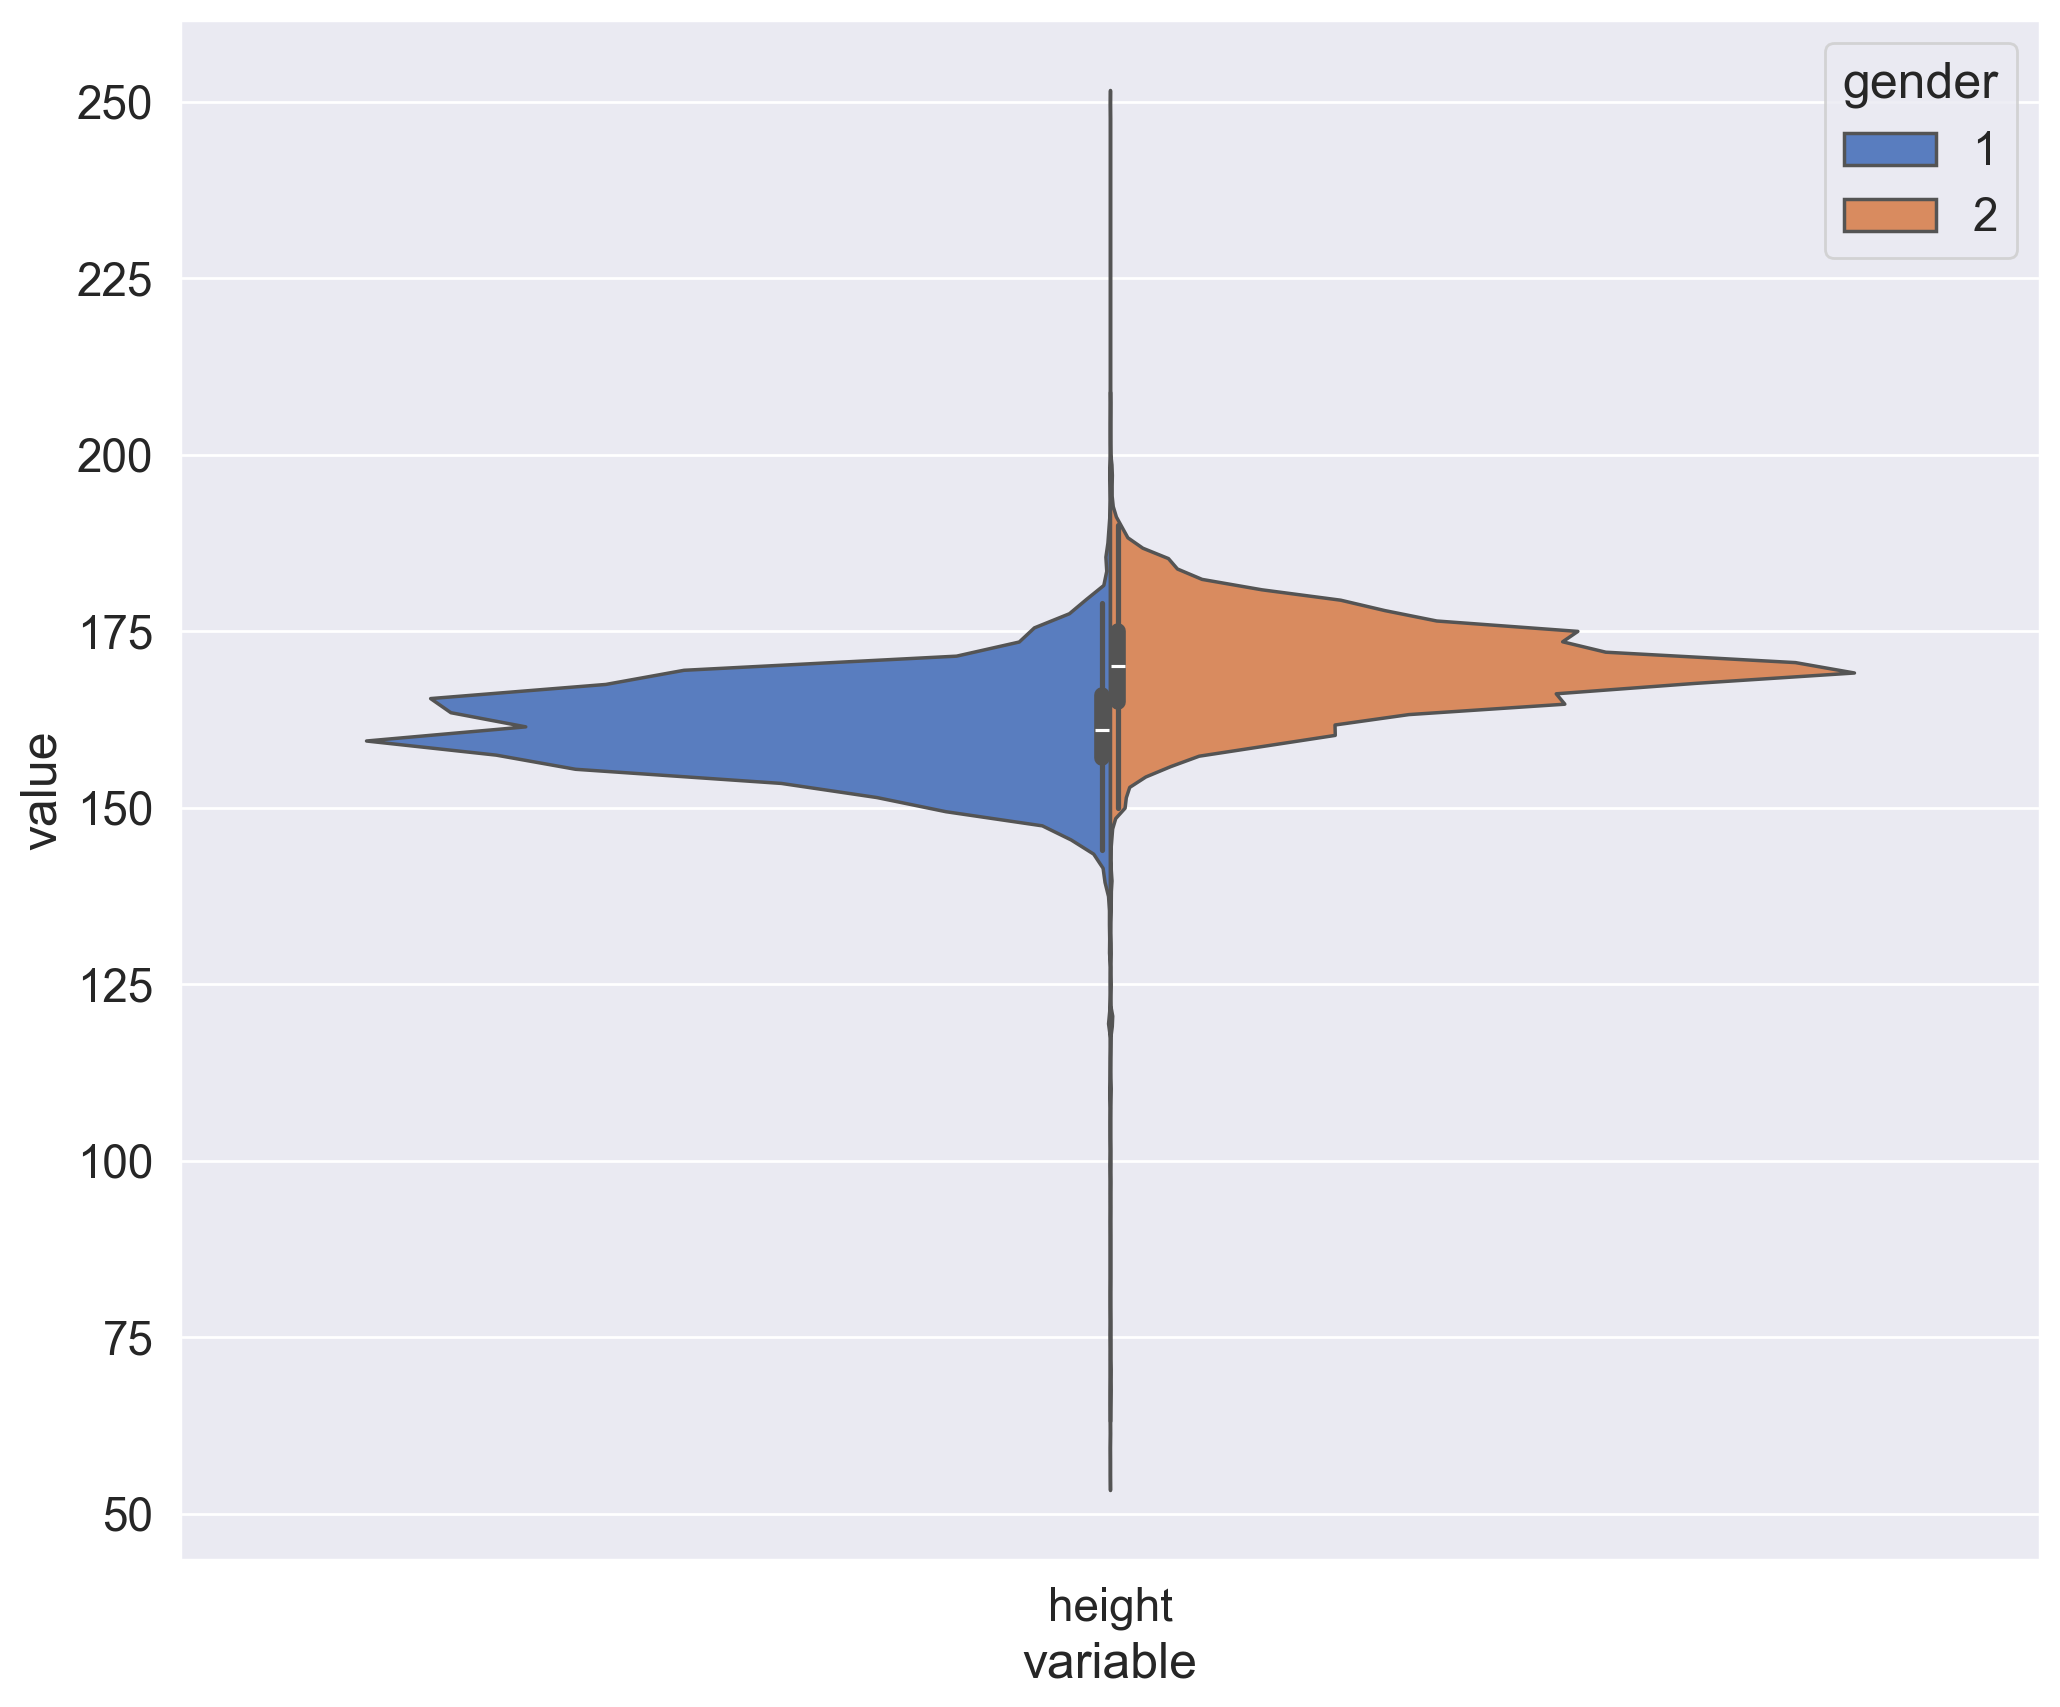

In [130]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

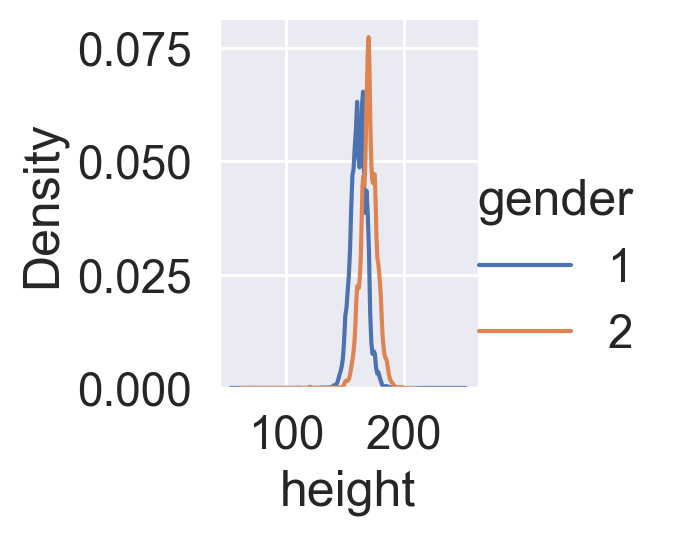

In [131]:
sns.FacetGrid(df, hue="gender").map(sns.kdeplot, "height").add_legend()

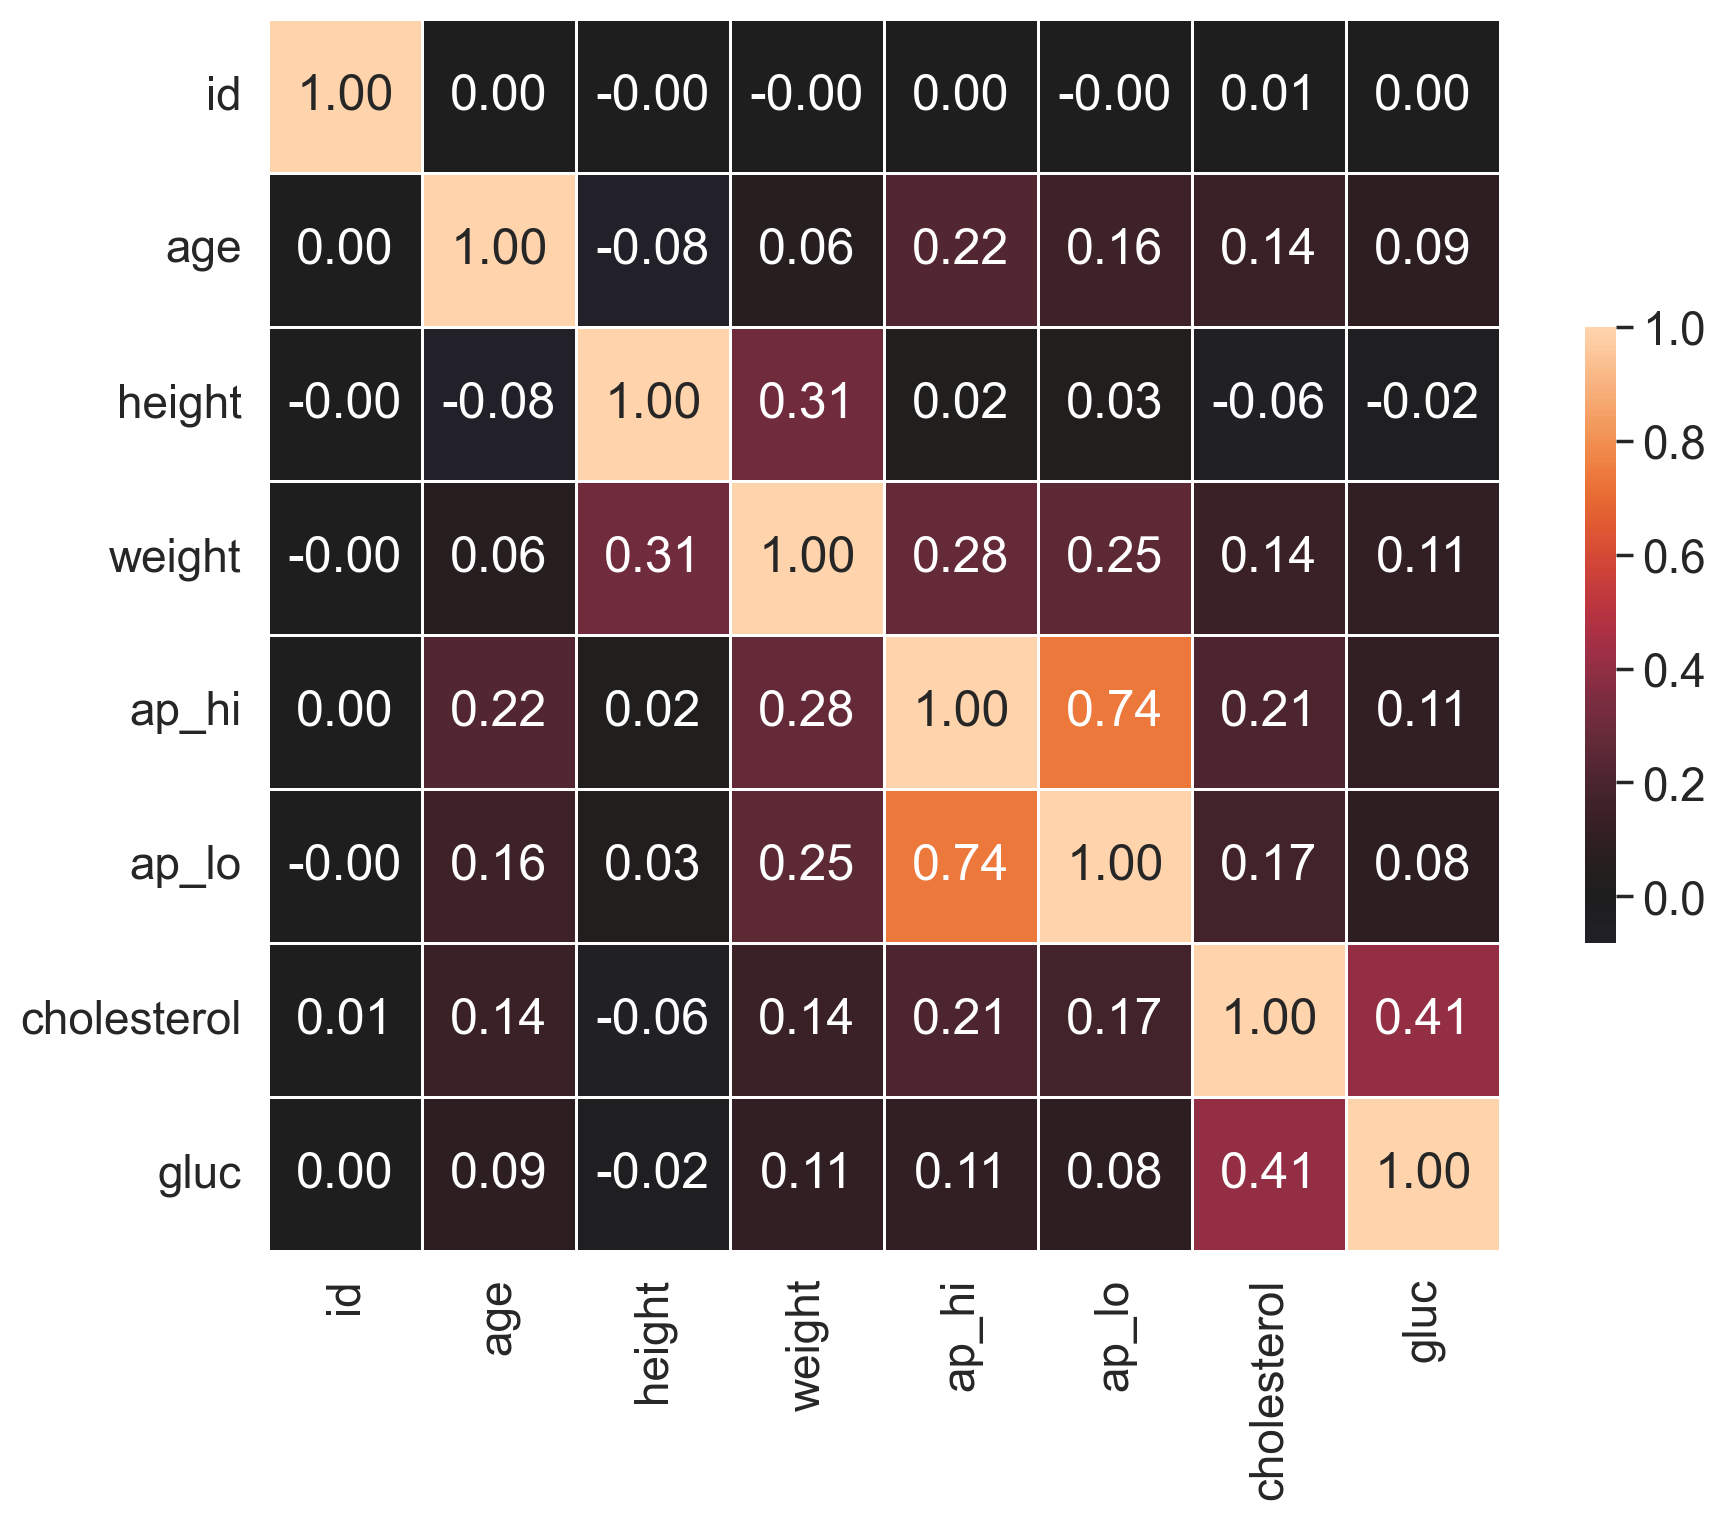

In [134]:
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

sns.heatmap(
    corr,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

<Axes: xlabel='age_years', ylabel='count'>

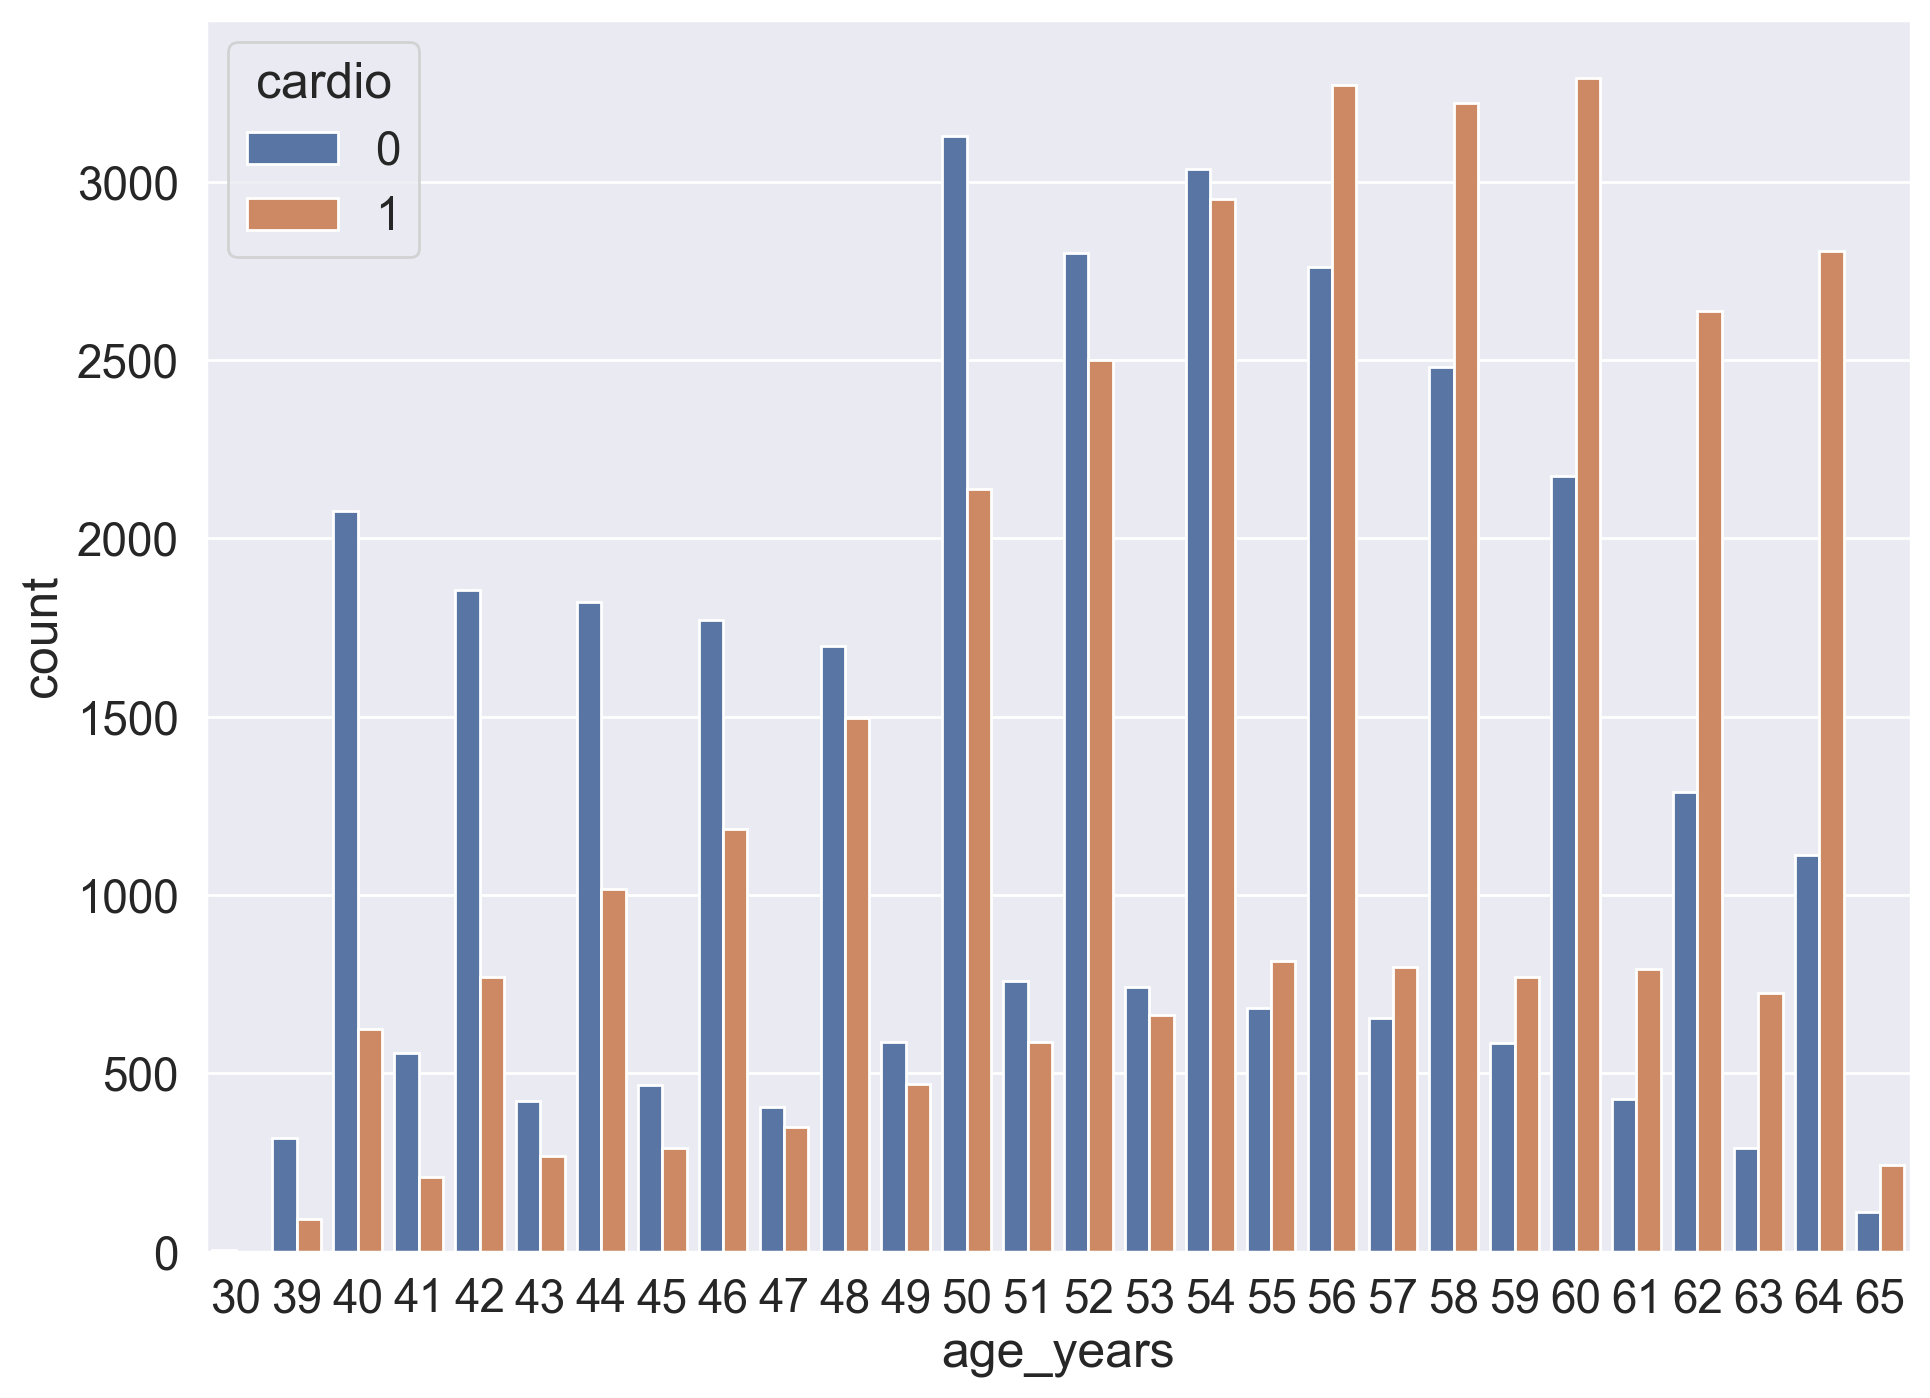

In [132]:
sns.countplot(x="age_years", hue="cardio", data=df)